In [3]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [33]:
# 생성자를 호출하는 밥법
class MyLayer : 
    def __init__(self, unit):
        self.unit = unit
        print('unit: ', unit)
        print("hello")
        
    def __call__(self, v): # 객체이름을 가지고 부를수 있는 함수
        print(self.unit, v)
        print(v)
        return self # 객체이름을 함수로 사용가능
    # 여러번 호출가능
        
    def test(self, v):
        print(v)
    
#A = MyLayer()
#A.test(10)
#A(20)

#A = MyLayer()(20)
# A = MyLayer()
# A(20)

A = MyLayer(20)
# A = MyLayer(20)([1,2,3,4,5])
A([3,3,4])
A.test(4)

B = MyLayer(20)
C = MyLayer(20)


unit:  20
hello
20 [3, 3, 4]
[3, 3, 4]
4
unit:  20
hello
unit:  20
hello


__callable__이란  
이미 생성된 객체에 대해서 함수처럼 호출할 수 있도록 함

# 얼굴인식 
---

In [36]:
from sklearn.datasets import fetch_olivetti_faces
import cv2

orl = fetch_olivetti_faces()
data = orl.data # 0~1로 정규화 되어있음.
target = orl.target
print(data.shape)
print(target.shape)


(400, 4096)
(400,)


In [56]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

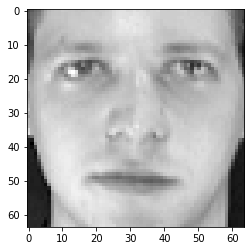

In [37]:
plt.imshow(data[0, :].reshape(64, 64), cmap="gray")

In [38]:
data = np.zeros((400, 32*32), dtype="uint8")

for i, d in enumerate(orl.data): # i: index d: value
    image = cv2.resize(d.reshape(64, 64), (32,32))
    data[i,:] = image.flatten()*255

(400, 1024)


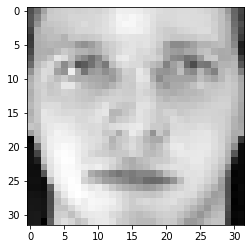

In [40]:
plt.imshow(data[0, :].reshape(32, 32), cmap="gray")
print(data.shape)

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
    train_test_split(data, target, test_size=0.2)
    
print(X_train.shape)
print(X_val.shape)


(320, 1024)
(80, 1024)


In [108]:
# cnn을 돌리기위해 4차원 & 원핫 인코딩
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)

import keras.utils as utils
y_train_e = utils.to_categorical(y_train, 40)
y_val_e = utils.to_categorical(y_val, 40)

In [109]:
print(X_train.shape)
print(y_train_e.shape)
print(X_val.shape)
print(y_val_e.shape)

X_train = X_train / 255
X_val = X_val /255
# y_train = y_train / 255

(320, 32, 32, 1)
(320, 40)
(80, 32, 32, 1)
(80, 40)


In [112]:
model = Sequential()

model.add(Conv2D(input_shape = (32,32,1), filters = 16, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))

model.add(Dense(40, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_23 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 50)          14450     
_________________________________________________________________
activation_24 (Activation)   (None, 8, 8, 50)        

In [113]:
hist = model.fit(x = X_train, y = y_train_e, # 원핫 인코팅된 y
                batch_size = 50,
                epochs = 50, verbose = 1) 


Epoch 1/50
320/320 [==============================] - 1s 2ms/step - loss: 3.7029 - accuracy: 0.0219
Epoch 2/50
320/320 [==============================] - 0s 894us/step - loss: 3.6831 - accuracy: 0.0500
Epoch 3/50
320/320 [==============================] - 0s 1ms/step - loss: 3.6742 - accuracy: 0.0312
Epoch 4/50
320/320 [==============================] - 0s 981us/step - loss: 3.6623 - accuracy: 0.0312
Epoch 5/50
320/320 [==============================] - 0s 1ms/step - loss: 3.6420 - accuracy: 0.0719
Epoch 6/50
320/320 [==============================] - 0s 1ms/step - loss: 3.6164 - accuracy: 0.0875
Epoch 7/50
320/320 [==============================] - 0s 978us/step - loss: 3.5674 - accuracy: 0.0562
Epoch 8/50
320/320 [==============================] - 0s 934us/step - loss: 3.4749 - accuracy: 0.1000
Epoch 9/50
320/320 [==============================] - 0s 903us/step - loss: 3.3007 - accuracy: 0.1562
Epoch 10/50
320/320 [==============================] - 0s 938us/step - loss: 3.1054 - accu

In [114]:
score = model.evaluate(X_val, y_val_e, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.987500011920929


In [80]:
p = model.predict(X_val[1,:].reshape(-1, 32, 32, 1))

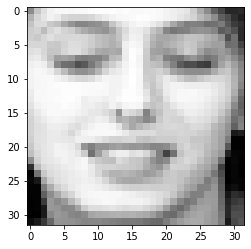

In [81]:
plt.imshow(X_val[0,:].reshape(32,32), cmap='gray')

## 레이어 정보가져오기

In [115]:
print(type(model.layers))

for layer in model.layers:
    print(layer.name)

<class 'list'>
conv2d_24
max_pooling2d_22
conv2d_25
activation_23
max_pooling2d_23
conv2d_26
activation_24
max_pooling2d_24
flatten_10
dense_20
dense_21
dense_22


fit은 기존 구조를 가진채 wight를 변경하는 것.  

model을 초기화하면 layer의 이름이 변경되는데 이것은 네트워크 구조가 바뀌었다는 것이다.  



In [120]:
W = model.layers[0].get_weights() # 가중치를 가져옴 (필터에서는 필터레이어)
print(len(W)) # 2개의 리스트가 존재한다.
print(W[0].shape) # 필터 
print(W[1].shape) # 바이어스

2
(3, 3, 1, 16)
(16,)


In [122]:
# 첫번째 레이어의 필터 (conv2d_24)
filters = W[0]
f1 = filters[:,:,0,0] 
print(f1) # 첫번째 필터

f2 = filters[:,:,0,1] 
print(f2) # 두번째 필터

[[ 0.01164547  0.07240806  0.29042676]
 [ 0.16785982 -0.01767077  0.26938114]
 [ 0.08800589  0.26112187  0.24568504]]
[[ 0.0689042   0.22786412  0.10589252]
 [ 0.07116144  0.2695119   0.11613863]
 [-0.03956493  0.24412793  0.29277447]]


In [124]:
print(model.layers[1].get_weights()) # 가중치를 가져옴 (필터에서는 필터레이어)
# pooling layer는 가중치가 존재하지 않는다.

[]


In [126]:
# conv2d_25
W2 = model.layers[2].get_weights()
filters = W2[0]
print(filters.shape) # 3번째: 인풋채널 4: 출력채널
f1 = filters[:,:,0,0]
print(f1)

(3, 3, 16, 32)
[[-0.10617333 -0.04469669  0.15040165]
 [ 0.02060238 -0.00361833  0.14315619]
 [ 0.03138472  0.01841496  0.10223064]]


weight가 있는 층은 param가 있어야한다.  
param의 개수는 weight의 개수라 볼 수 있다.  



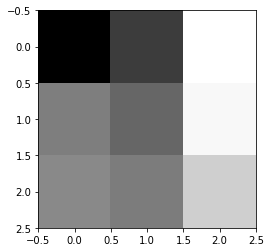

In [127]:
plt.imshow(f1, cmap='gray')

필터를 적용한 중간 데이터를 구하려면??  

-> 함수형 API를 사용

In [130]:
from keras.models import Model

model2 = Model(inputs=model.inputs, output=model.layers[0].output)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("co...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [171]:

I = X_train[0, :, :, :] # X
 

# 첫번쨰 이미지
# 4차원을 유지해주기 위해서
I = X_train[2:3, :, :, :] # 행 컬럼 유지
print(I.shape)

(1, 32, 32, 1)


In [134]:
# 예시
A = np.array([[1,2,3], [4,5,6]])

print(A)
print(A[0,0])
print(A[0:1, 0:1]) # 행 컬럼 유지

[[1 2 3]
 [4 5 6]]
1
[[1]]


In [183]:
feature_maps = model2.predict(I)  # 특정 네트워크의 마지막 값을 알기 위해서 사용하는데 보통 예층값인데 여기서는 output을 했기 때문에 output을 의미한다.
print(feature_maps.shape)

(1, 32, 32, 16)


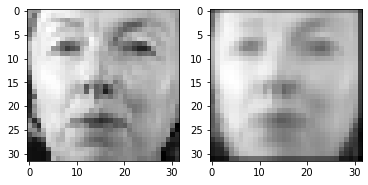

In [170]:
img = feature_maps[0, :, :, 0]
plt.subplot(121)

plt.imshow(I[0, :, :, 0], cmap="gray")
plt.subplot(122)
plt.imshow(img, cmap="gray")

In [162]:
img = feature_maps[0, :, :, 2]


[[-0.4300461  -0.5786463  -0.57759607 ... -0.63400984 -0.5290855
  -0.2500085 ]
 [-0.6423079  -0.8217037  -0.8219701  ... -0.9012755  -0.7617575
  -0.39758945]
 [-0.65159786 -0.83283496 -0.8345157  ... -0.92980564 -0.7901319
  -0.41443637]
 ...
 [-0.15990722 -0.2232241  -0.22158152 ... -0.87677646 -0.92290664
  -0.5791923 ]
 [-0.16010389 -0.22102103 -0.21815255 ... -0.92438555 -0.97758067
  -0.61088705]
 [-0.07208964 -0.10129525 -0.0974153  ... -0.54769444 -0.5813041
  -0.3476119 ]]


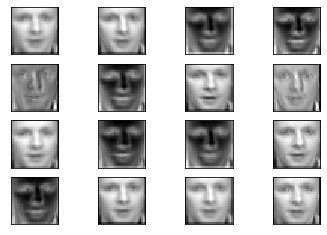

In [184]:
for ix in range(16):
    ax = plt.subplot(4,4,ix+1) # 4 X 4 공간에 1부터 시작해서 그림그리기
    fm = feature_maps[0, :, :, ix]
    plt.imshow(fm, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

필터를 적용했을 때 완전 어둡거나 밝을 경우 무언가 잘못된 학습이 될 가능성이 높다.  

현재 visualization에넌 크게 문제가 없는 것 같다.  



In [185]:
model3 = Model(inputs=model.inputs, output=model.layers[2].output)
I = X_train[189:190, :, :, :] # 행 컬럼 유지
feature_maps = model3.predict(I)  
print(feature_maps.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


(1, 16, 16, 32)


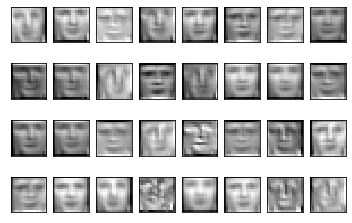

In [186]:
for ix in range(32):
    ax = plt.subplot(4,8,ix+1) # 4 X 4 공간에 1부터 시작해서 그림그리기
    fm = feature_maps[0, :, :, ix]
    plt.imshow(fm, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [187]:
model3 = Model(inputs=model.inputs, output=model.layers[5].output)
I = X_train[189:190, :, :, :] # 행 컬럼 유지
feature_maps = model3.predict(I)  
print(feature_maps.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


(1, 8, 8, 50)


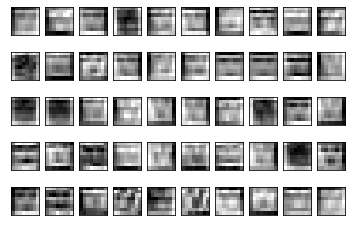

In [188]:
for ix in range(50):
    ax = plt.subplot(5,10,ix+1) # 4 X 4 공간에 1부터 시작해서 그림그리기
    fm = feature_maps[0, :, :, ix]
    plt.imshow(fm, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

이미 64 x 64 영상을 32로 줄였기 때문에 많은 정보가 손실되었을 것이다. 

# 더 세부적인 normalization

In [194]:
d = np.array([10, 80, 20, 50, 20, 20, 50])
n = d / np.max(d) # 최대값으로 나눠 정규화
print(n)

d = np.array([10, 80, 20, 50, 20, 20, 50])
n = d - np.mean(d)
print(n)
print(np.mean(n)) # zero mean -> 정규분포 곡선에 따라 해석하기 위해
print(np.std(n)) # 표준편차

n = (d - np.mean(d)) / np.std(d)
print(n)
print(np.mean(n)) # zero mean -> 정규분포 곡선에 따라 해석하기 위해
print(np.std(n)) # 표준편차 -> 1에 가까워진다.  

[0.125 1.    0.25  0.625 0.25  0.25  0.625]
[-25.71428571  44.28571429 -15.71428571  14.28571429 -15.71428571
 -15.71428571  14.28571429]
-1.0150610510858574e-15
23.211538298959887
[-1.10782342  1.90791811 -0.6770032   0.61545745 -0.6770032  -0.6770032
  0.61545745]
-7.930164461608261e-17
0.9999999999999999


조명에 영향을 덜 받게 할 수 있음

non-trainable params : 정규화 과정을 하면 파라미터가 추가된다.   

h = wx + b   
정규화?  <- 비선형 함수를 사용하기 전에 사용 (O) / -1\~1   

out = f(h)  <- 시그모이드일 경우 -4~4 / 큰 의미가 없음  
정규화?  <-(X)   
 
미분값 만큼 가중치를 변경하는 거라 정규화를 하고나서 시그모이드를 해도 잘 될 가능성이 높다. 



In [201]:
X_train, X_val, y_train, y_val = \
    train_test_split(data, target, test_size=0.2)
# cnn을 돌리기위해 4차원 & 원핫 인코딩
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)

import keras.utils as utils
y_train_e = utils.to_categorical(y_train, 40)
y_val_e = utils.to_categorical(y_val, 40)

model = Sequential()

model.add(Conv2D(input_shape = (32,32,1), filters = 16, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization()) # activation 전에!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(40, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_29 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 32)        

In [202]:
history = model.fit(X_train, y_train_e ,
                        batch_size=20,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_val, y_val_e ))
model.evaluate(X_val, y_val_e)

Train on 320 samples, validate on 80 samples
Epoch 1/50
320/320 [==============================] - 2s 7ms/step - loss: 2.6973 - accuracy: 0.3219 - val_loss: 32.1285 - val_accuracy: 0.0500
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 0.7915 - accuracy: 0.9187 - val_loss: 16.2136 - val_accuracy: 0.0500
Epoch 3/50
320/320 [==============================] - 1s 5ms/step - loss: 0.3129 - accuracy: 0.9875 - val_loss: 13.6175 - val_accuracy: 0.0250
Epoch 4/50
320/320 [==============================] - 1s 3ms/step - loss: 0.1517 - accuracy: 1.0000 - val_loss: 8.8698 - val_accuracy: 0.0750
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 1.0000 - val_loss: 5.5247 - val_accuracy: 0.1125
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0565 - accuracy: 1.0000 - val_loss: 4.4410 - val_accuracy: 0.1250
Epoch 7/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0486 - accuracy: 1.0000 

[0.09192074984312057, 0.9750000238418579]

# fashion mnist

(60000, 28, 28)
(10000, 28, 28)
(60000,)


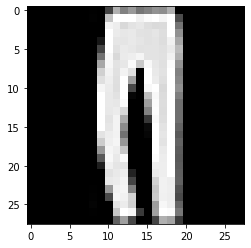

In [6]:
from keras.datasets import mnist, fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()
print(X_train.shape)
plt.imshow(X_train[2], cmap='gray')
print(X_val.shape)
plt.imshow(X_test[2], cmap='gray')
print(y_train.shape)


In [17]:

# cnn을 돌리기위해 4차원 & 원핫 인코딩
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

import keras.utils as utils
y_train_e = utils.to_categorical(y_train, 10)
y_val_e = utils.to_categorical(y_val, 10)

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization()) # activation 전에!
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_18 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)         

In [18]:
history = model.fit(X_train, y_train_e ,
                        batch_size=20000,
                        epochs=1,
                        verbose=1)
model.evaluate(X_val, y_val_e)

Epoch 1/1
10000/10000 [==============================] - 6s 571us/step


[2.273030219268799, 0.10000000149011612]

일단 시그모이드는 값이 커져 기울기가 발산하거나 수렴하여 구림  

배치사이즈가 크다고 좋은 것이 아니다.  
또한 너무 작다고 좋은것도 아니다.  

만약 10개의 class 라면 배치 사이즈가 100은 되야하지 않을까..?

In [21]:

# cnn을 돌리기위해 4차원 & 원핫 인코딩
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

import keras.utils as utils
y_train_e = utils.to_categorical(y_train, 10)
y_val_e = utils.to_categorical(y_val, 10)

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(BatchNormalization())

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
# model.add(BatchNormalization()) # activation 전에!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
# model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
# model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)              

In [20]:
history = model.fit(X_train, y_train_e ,
                        epochs=1,
                        verbose=1)
model.evaluate(X_val, y_val_e)

Epoch 1/1
10000/10000 [==============================] - 2s 249us/step


[0.3682535144686699, 0.8695999979972839]

배치 없이 relu만 사용하여도 어느정도 성능이 나오는 것을 볼 수 있음  

In [22]:
history = model.fit(X_train, y_train_e ,
                        batch_size=100,
                        epochs=1,
                        verbose=1)
model.evaluate(X_val, y_val_e)

Epoch 1/1
10000/10000 [==============================] - 3s 336us/step


[0.3703761920928955, 0.8657000064849854]

음 배치를 써도 비슷함  

정규화도 추가해보자  

In [23]:

# cnn을 돌리기위해 4차원 & 원핫 인코딩
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

import keras.utils as utils
y_train_e = utils.to_categorical(y_train, 10)
y_val_e = utils.to_categorical(y_val, 10)

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization()) # activation 전에!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_22 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)         

In [24]:
history = model.fit(X_train, y_train_e ,
                        batch_size=100,
                        epochs=1,
                        verbose=1)
model.evaluate(X_val, y_val_e)

Epoch 1/1
10000/10000 [==============================] - 6s 561us/step


[0.3316890867948532, 0.879800021648407]

## dropout

In [25]:

# cnn을 돌리기위해 4차원 & 원핫 인코딩
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

import keras.utils as utils
y_train_e = utils.to_categorical(y_train, 10)
y_val_e = utils.to_categorical(y_val, 10)

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # 25%를 제거 weight를 0으로 만든다. 
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization()) # activation 전에!
model.add(Dropout(0.25)) # 25%를 제거 weight를 0으로 만든다. 

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_25 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_26 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)       

In [26]:
history = model.fit(X_train, y_train_e ,
                        batch_size=100,
                        epochs=1,
                        verbose=1)
model.evaluate(X_val, y_val_e)

Epoch 1/1
10000/10000 [==============================] - 11s 1ms/step


[0.4278967083930969, 0.8525000214576721]

옵티마이저의 경우 작은 값이 좋긴하다.  

